# Sentiment Analysis on Clothing and Electronics Reviews

This notebook replicates the sentiment analysis process from a previous example, using datasets from clothing and electronics product reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
import warnings
warnings.filterwarnings('ignore')

## Load the Datasets

In [3]:
clothing_df = pd.read_csv("clothing_reviews.csv")
electronics_df = pd.read_csv("electronics_review.csv")

# Label each dataset
clothing_df['Category'] = 'Clothing'
electronics_df['Category'] = 'Electronics'

# Merge them
df = pd.concat([clothing_df, electronics_df], ignore_index=True)
df.shape

(2997, 15)

## Basic Data Exploration

In [4]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       2997 non-null   float64
 1   Customer Name     2997 non-null   object 
 2   Customer Age      2997 non-null   float64
 3   Gender            2997 non-null   object 
 4   Purchase Date     2997 non-null   object 
 5   product_id        2461 non-null   float64
 6   Product Category  2997 non-null   object 
 7   product_name      2461 non-null   object 
 8   Quantity          2997 non-null   float64
 9   Payment Method    2997 non-null   object 
 10  Review Text       2913 non-null   object 
 11  Rating            2996 non-null   float64
 12  Category          2997 non-null   object 
 13  Product ID        536 non-null    object 
 14  Product Name      536 non-null    object 
dtypes: float64(5), object(10)
memory usage: 351.3+ KB


,Customer ID,Customer Name,Customer Age,Gender,Purchase Date,product_id,Product Category,product_name,Quantity,Payment Method,Review Text,Rating,Category,Product ID,Product Name
1603,11480.0,Joshua Silva,55.0,Male,03-09-2021 01:13,552458.0,Clothing,Vintage Sweatpants with Breathable Fabric,1.0,Credit Card,"Great top!! love the fit, it pairs great with ...",5.0,Clothing,NaN,NaN
1977,20194.0,Taylor Martinez,27.0,Male,04-01-2020 09:06,224204.0,Clothing,Textured Cargo Pants with Breathable Fabric,2.0,PayPal,Such a beautiful print. i sized up to a 14 bec...,4.0,Clothing,NaN,NaN
2687,23914.0,Jennifer Kline,55.0,Male,16-06-2021 07:07,NaN,Electronics,NaN,3.0,Credit Card,"Reliability,Best non apple usb to lightning ca...",4.1,Electronics,PROD-TM4T8JQB,Xiaomi 14 Ultra JNXC
2061,11888.0,Eric Bailey,52.0,Female,12-10-2020 12:59,270079.0,Clothing,Oversized Cargo Pants with Breathable Fabric,5.0,Credit Card,"This is a really nice top, especially for the ...",4.0,Clothing,NaN,NaN
229,9809.0,Mary Krueger DVM,22.0,Male,23-11-2022 12:56,241756.0,Clothing,Embroidered Shirt with Lightweight Fabric,2.0,Credit Card,I was worried about this item when i ordered i...,2.0,Clothing,NaN,NaN


## Add Sentiment Labels using TextBlob

In [5]:
def get_sentiment(text):
    if pd.isna(text):
        return "Neutral"
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Review Text'].apply(get_sentiment)
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,2707
Negative,169
Neutral,121


## Sentiment Distribution

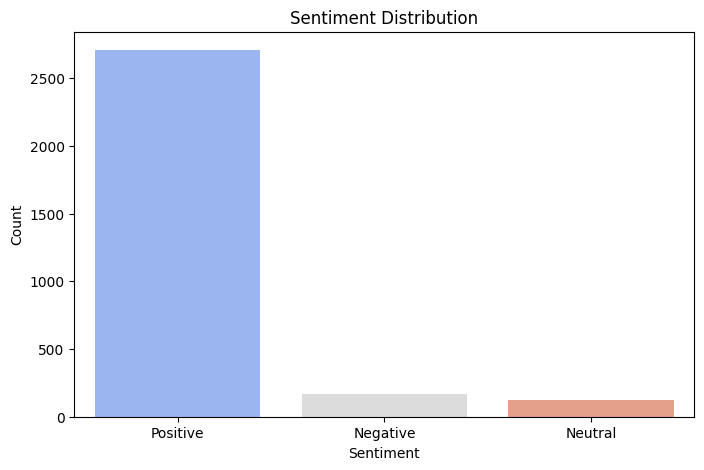

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Sentiment by Product Category

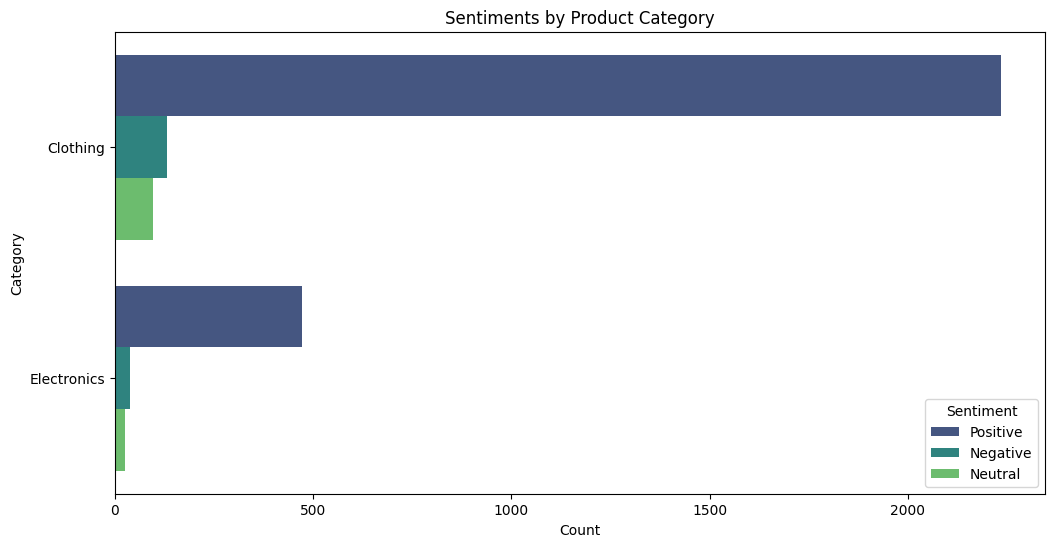

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Category', hue='Sentiment', palette='viridis')
plt.title('Sentiments by Product Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Sentiment')
plt.show()

## Word Clouds for Sentiments

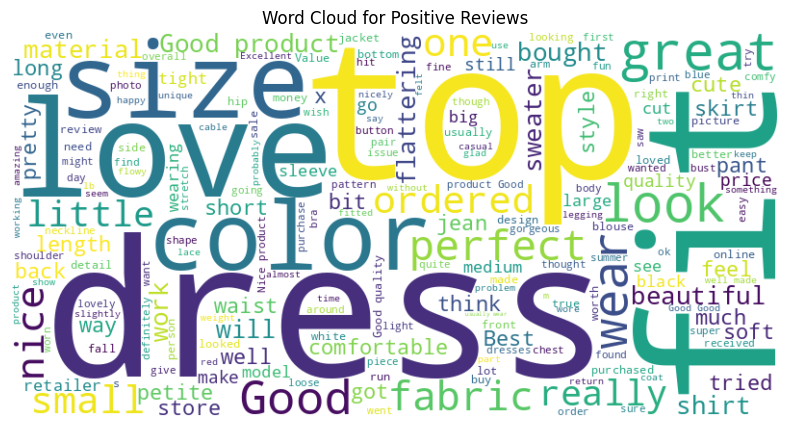

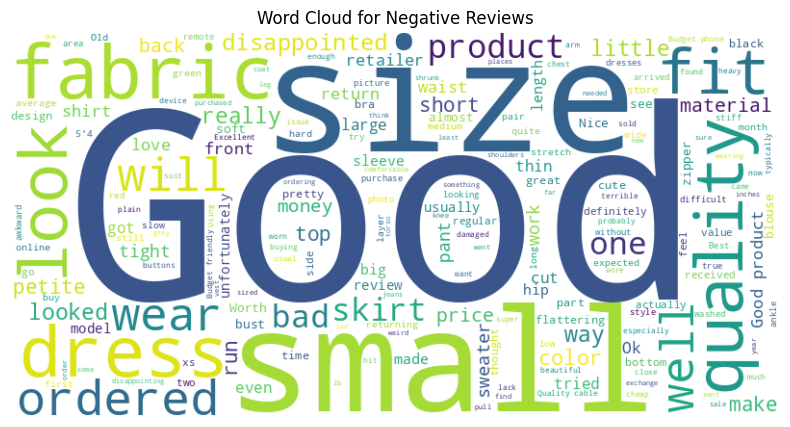

In [8]:
for sentiment in ['Positive', 'Negative']:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Review Text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.show()

## Save the Final Data with Sentiment

In [9]:
df.to_csv("merged_reviews_with_sentiment.csv", index=False)